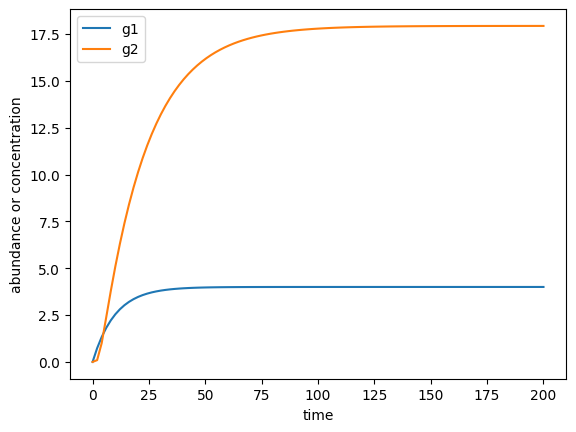

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#y0 = [g1,g2]
y0 = [0,0]


#timepoint
t = np.linspace(0,200,num=100) #num = 100 time points

k_1 = 0.4
gamma_1 = 0.1 #we can set this to < k_1 so that we can see the steady_state
k_2 = 0.9
gamma_2 = 0.05
c = 1
n = 4

params = [k_1, gamma_1, k_2, gamma_2, c, n]

def sim(variables, t, params):
    g1 = variables[0]
    g2 = variables[1]
    
    k_1 = params[0]
    gamma_1 = params[1]
    k_2 = params[2]
    gamma_2 = params[3]
    c = params[4]
    n = params[5]
    
    dG1dt = k_1 - gamma_1*g1
    dG2dt = (g1**n / (c**n + g1**n))* k_2 - gamma_2 * g2 #activation model
    # dG2dt = (c**n / (g1**n  + c**n))* k_2 - gamma_2 * g2 #repression model
    
    return [dG1dt, dG2dt]

y = odeint(sim,y0,t,args=(params,))

#plot with labels
plt.plot(t,y[:,0],label="g1")
plt.plot(t,y[:,1],label="g2")
plt.xlabel("time")
plt.ylabel("abundance or concentration")
plt.legend()
plt.show()

